In [147]:
import os.path
import gzip
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [148]:

def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)
    
    return edgeGraph

In [149]:
# Setting the path for edgelist file from Twitter
tweetPath = 'twitter_combined.txt'
tweetGraph  = dataGraph(tweetPath)
type (tweetGraph)
print("Converted Graph's file type is: ", type(tweetGraph))

Converted Graph's file type is:  <class 'networkx.classes.graph.Graph'>


In [150]:
print( nx.info(tweetGraph))

Name: 
Type: Graph
Number of nodes: 81306
Number of edges: 1342310
Average degree:  33.0187


In [163]:

# Creating a subnetwork, a subset of data is created by finding the neighbours from node '17116707'

# Using subgraph() function from networkx

nodes = tweetGraph.neighbors('90966499')
sub_network = tweetGraph.subgraph(nodes)
print(nx.info(sub_network))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 145
Average degree:  15.2632


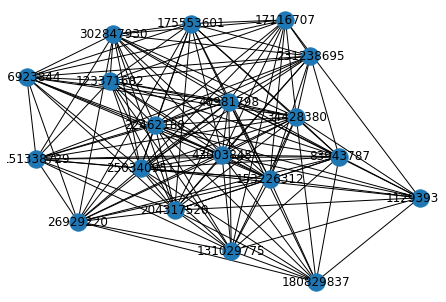

In [164]:
nx.draw(sub_network, with_labels=True)
plt.show()

In [165]:

# Degree centrality (valency) of a node of a graph:
# the fraction of nodes a node v is connected to
nx.degree(sub_network)

DegreeView({'22462180': 18, '40981798': 18, '151338729': 14, '204317520': 17, '43003845': 18, '17116707': 13, '34428380': 18, '153226312': 18, '302847930': 15, '175553601': 14, '112939321': 11, '250340951': 18, '83943787': 16, '131029775': 14, '206923844': 14, '26929220': 14, '180829837': 11, '123371682': 15, '231238695': 14})

In [166]:
# Check if graph is connected

nx.is_connected(tweetGraph)

True

In [167]:
# Create list of connected graphs

def connected_component_subgraphs(network):
    for c in nx.connected_components(network):
        return network.subgraph(c)

In [168]:
connected_components  = connected_component_subgraphs(sub_network)

In [169]:
# Find number of nodes for each connected graph
[len(g) for g in connected_components] # the first and largest is most important

[8, 8, 9, 9, 8, 8, 8, 9, 9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 9]

In [170]:

# Show all of the connected components
sorted(nx.connected_components(connected_components))

[{'112939321',
  '123371682',
  '131029775',
  '151338729',
  '153226312',
  '17116707',
  '175553601',
  '180829837',
  '204317520',
  '206923844',
  '22462180',
  '231238695',
  '250340951',
  '26929220',
  '302847930',
  '34428380',
  '40981798',
  '43003845',
  '83943787'}]

In [171]:
# Diameter of the graph
nx.diameter(sub_network)

2

In [173]:
nx.shortest_path(sub_network,source=90966499)

NodeNotFound: Source 90966499 not in G